# Test if packages were installed correctly

## Basic packages

In [17]:
import os
import sqlite3
from math import ceil


## Pandas, Matplotlib, Seaborn, Scikit-Learn

In [18]:
import numpy as np
import pandas as pd

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# for better resolution plots
%config InlineBackend.figure_format = 'retina' 

# Setting seaborn style
sns.set()

In [20]:
from matplotlib import __version__ as mplver
print(mplver)

3.8.4


In [21]:
import warnings
warnings.filterwarnings('ignore')

import logging
logging.getLogger('matplotlib').setLevel(logging.WARNING)
logger = logging.getLogger()
logger.setLevel(logging.ERROR)

In [22]:
from sklearn import datasets

In [23]:
dataset = datasets.load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


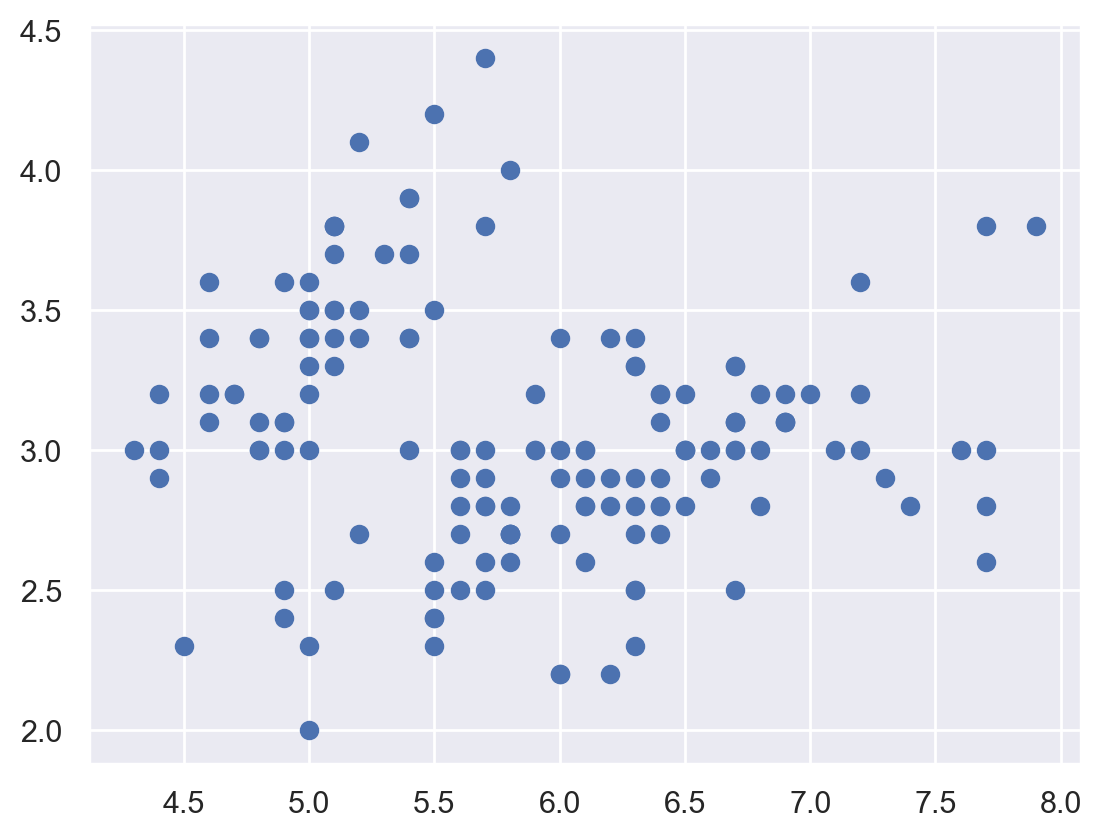

In [24]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.show()

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

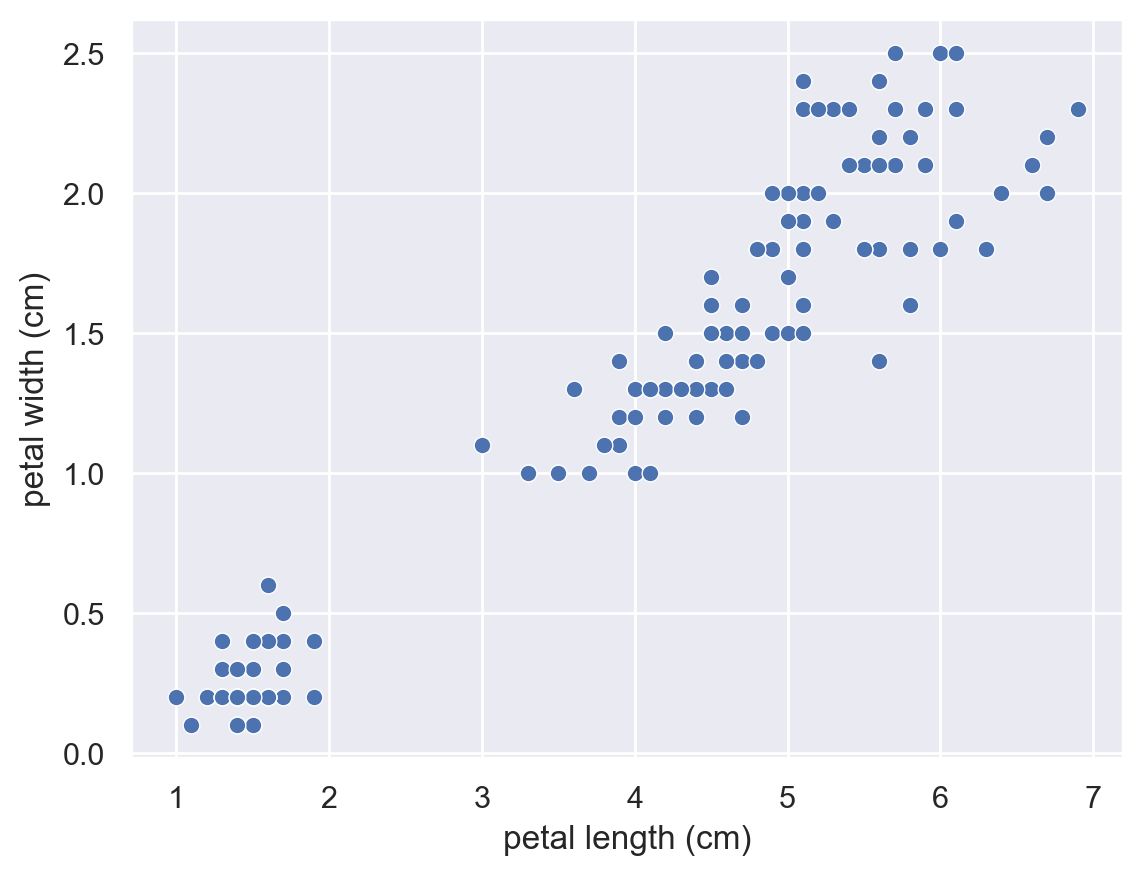

In [25]:
sns.scatterplot(df, x='petal length (cm)', y='petal width (cm)')

## Test ProfileReport

In [26]:
from ydata_profiling import ProfileReport

In [27]:
profile = ProfileReport(
    df, 
    title='Iris Data',
    correlations={
        "pearson": {"calculate": True},
        "spearman": {"calculate": False},
        "kendall": {"calculate": False},
        "phi_k": {"calculate": False},
        "cramers": {"calculate": False},
    },
)

In [28]:
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Test Packages for SOM

In [29]:
from IPython.display import YouTubeVideo
import minisom

## Test scikit-learn

In [30]:
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split


In [31]:
kmclust = KMeans(n_clusters=3, init='random', n_init=10, random_state=1)
km_labels = kmclust.fit_predict(df)

In [32]:
# Preparing the data
X = df
y = km_labels

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)